In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew 

#### 데이터 소개 : 미국의 아이오와 주 에임스(Ames)에 있는 주택과 매매금액에 관한 데이터이다. 총 79개의 변수는 집과 연관되 있는 내부적, 외부적 요인들로 구성되어 있다. 데이터의 개수는 총 1460개

In [2]:
test = pd.read_csv('./data/test_new.csv') 
train = pd.read_csv('./data/train_new.csv') 

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,20,RL,NaN,6897,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.751950
856,857,80,RL,NaN,10970,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,11.898195
857,858,60,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,12.066816
858,859,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Family,11.931642


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal
1,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
2,863,20,RL,81.0,9672,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal
3,864,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal
4,865,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
596,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
597,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
598,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (860, 81) 
The test data size before dropping Id feature is : (600, 80) 

The train data size after dropping Id feature is : (860, 80) 
The test data size after dropping Id feature is : (600, 79) 


# <span style="color:blue"> Data Processing 전처리 같이 해봅시다

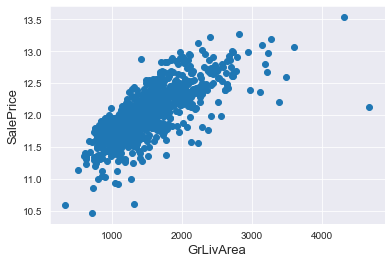

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Q1. 위 그림에서 이상치로 판단되는 데이터를 제거하시오.**

**사람마다 기준은 다르나 저는 오른쪽 따로노는 아이가 이상하군요....?**

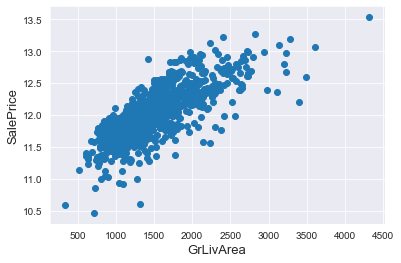

In [7]:
# 이상치 삭제하기
train = train[train['GrLivArea'] < 4500 ]

# Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Features engineering

In [8]:
# 총 데이터는 1459 개, 변수는 79개
ntrain = train.shape[0] 
ntest = test.shape[0]
y_train = train.SalePrice.values # train 데이터 SalePrice(종속변수) 저장
all_data = pd.concat((train, test)).reset_index(drop=True) # train 과 test 합친 후 index 재설정
all_data.drop(['SalePrice'], axis=1, inplace=True) # SalePrice 버리기
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1459, 79)


### Missing Data

In [9]:
# missing value 가 많은 변수 내림차순 정렬
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100 # 각 변수의 null 값 비율
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520219
MiscFeature,96.298835
Alley,93.762851
Fence,80.740233
FireplaceQu,47.292666
LotFrontage,17.751885
GarageYrBlt,5.551748
GarageType,5.551748
GarageQual,5.551748
GarageFinish,5.551748


Text(0.5, 1.0, 'Percent missing data by feature')

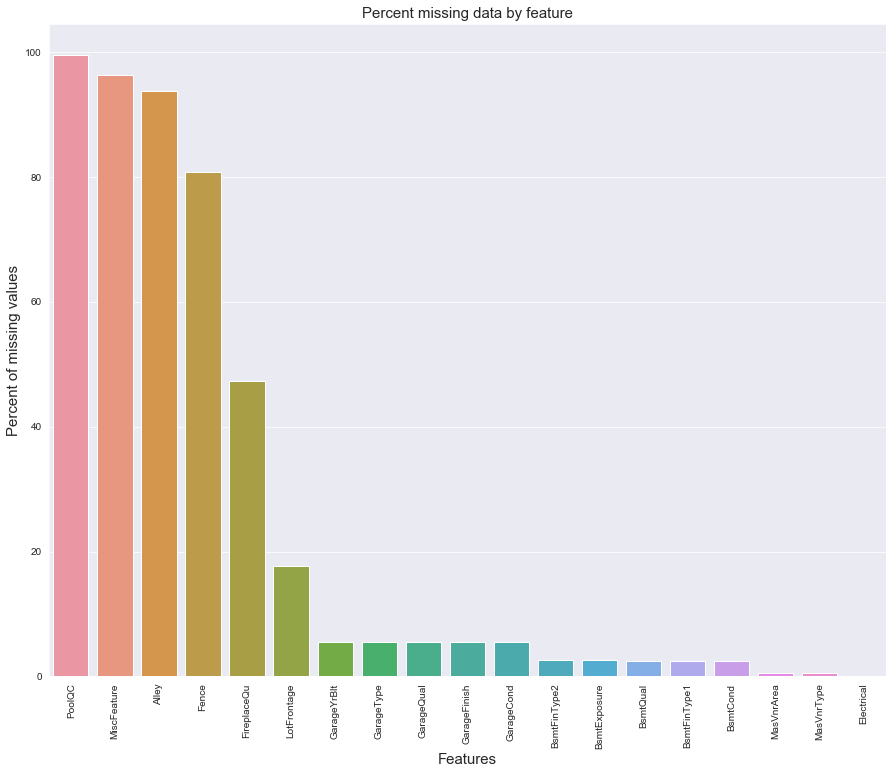

In [10]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Data Correlation**


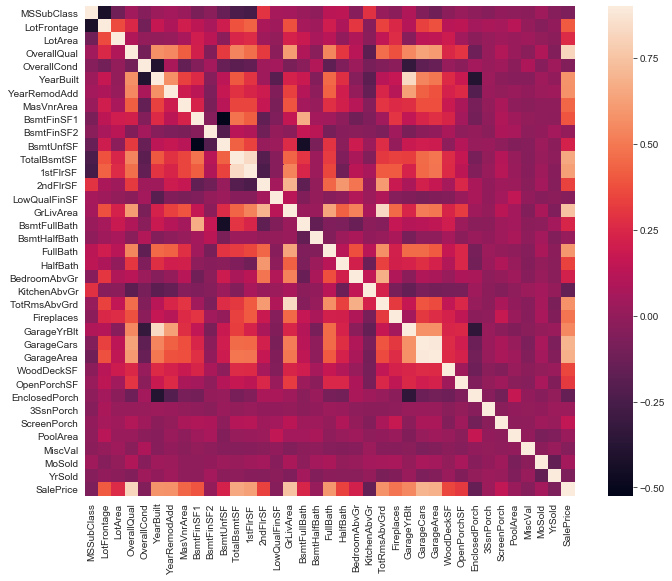

In [11]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Imputing missing values 

**Q3.결측치를 None으로 바꿔봅시다**  
**그냥 바꾸지만 마시고 왜 None으로 바꾸는지 한번 생각해보세요**

- **PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [12]:
# PoolQC 는 '수영장품질' 을 의미하며 missing value 비율이 약 99.5% 임
all_data["PoolQC"] = all_data['PoolQC'].fillna('None')

- **MiscFeature** : data description says NA means "no misc feature"


In [13]:
# MiscFeature 는 '기타 범주에서 다루지 않는 기타 기능' 을 의미하며 missing value 비율이 약 96.2% 임
all_data["MiscFeature"] = all_data['MiscFeature'].fillna('None')

- **Alley** : data description says NA means "no alley access"

In [14]:
# Alley 는 '속성에 대한 골목 접근의 유형' 을 의미하며 missing value 비율이 약 93.7% 임
all_data["Alley"] = all_data['Alley'].fillna('None')

- **Fence** : data description says NA means "no fence"

In [15]:
# Fence 는 '울타리 품질' 을 의미하며 missing value 비율이 약 80.7% 임
all_data["Fence"] = all_data['Fence'].fillna('None')

- **FireplaceQu** : data description says NA means "no fireplace"

In [16]:
# FireplaceQu 는 '벽난로 품질' 을 의미하며 missing value 비율이 약 47.2% 임
all_data["FireplaceQu"] = all_data['FireplaceQu'].fillna('None')

- **LotFrontage** : 

 **Q4. the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. 인 변수입니다. 그러면 결측치를 어떻게 바꾸는게 좋을까요?**

In [17]:
# '주택 재산과 연결된 각 거리의 면적은 이웃의 다른 집들과 거의 비슷할 것이다.'
# 'LotFrontage' 의 missing value 비율은 약 17.5% 임
# 같은 Neighborhood 의 평균값이나 중앙값을 사용할 수 있음
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))

- **Q5. GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [18]:
# GarageType : 차고위치, GarageFininsg : 차고 인테리어 완성도, GarageQual : 차고 품질, GarageCond : 차고 상태
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **Q6. GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [19]:
# 차고가 지어진 연도, 차고 면적, 주차 가능 대수
# 연속형 변수이기 때문에 null값을 None 이 아닌 0으로 대체 (0 이면 차고가 없다는 것을 의미)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- **Q7. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [20]:
# 모두 지하실 (basement) 에 관한 연속형 변수
# 지하실이 없다면 null 이기에 모두 0 으로 대체
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **Q8. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.


In [21]:
# 모두 지하실에 관한 범주형 변수
# 지하실이 없다면 null 이기에 모두 None 로 대체
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- **Q9. MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 


In [22]:
# 석조 베니어? 와 관련된 변수 인것으로 추측됨
all_data["MasVnrType"] = all_data['MasVnrType'].fillna('None')
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'  

**Q10. MSZoning에서 가장 많이 존재하는 값으로 결측치를 대체하세요**

In [23]:
pd.DataFrame(all_data['MSZoning'].value_counts()).index[0]

'RL'

In [24]:
all_data['MSZoning'].value_counts().idxmax()

'RL'

In [25]:
sub = all_data['MSZoning'].value_counts().idxmax()
all_data['MSZoning'] = all_data['MSZoning'].fillna(sub)

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely  remove it.


In [26]:
all_data['Utilities'].value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [27]:
# 3개를 제외한 모든 데이터가 AllPub ( 모두사용가능 ) 이므로, 변수 삭제
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : data description says NA means typical

In [28]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


**Q11.  가장 많이 존재하는 값으로 결측치를 대체하세요**

In [29]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].value_counts().idxmax())

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.


In [30]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].value_counts().idxmax())

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [31]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].value_counts().idxmax())
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].value_counts().idxmax())

- **SaleType** : Fill in again with most frequent which is "WD"

In [32]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].value_counts().idxmax())

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [33]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Is there any remaining missing value ? 

In [34]:
# Check remaining missing values if any
# missing value 없음!
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### More features engeneering

**Transforming some numerical variables that are really categorical**   

숫자형태를 한 값일 뿐 실제 연속형도 숫자 데이터도 아니죠? 따라서 문자형식으로 바꾼후 라벨링 인코더 하겠습니다.

**Q12. 데이터를 문자형으로 바꾸세요.**

In [35]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

**Label Encoding some categorical variables that may contain information in their ordering set** 

**Q13. LabelEncoder로 해당 범주형 데이터를 바꿔보세요..**

In [36]:
temp = all_data.copy()

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [38]:
for c in cols:
    l_Encoder = LabelEncoder()
    l_Encoder.fit(all_data[c].values)
    all_data[c] = l_Encoder.transform(all_data[c].values)

In [39]:
# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1459, 78)


**Adding one more important feature**

In [40]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [41]:
# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1459, 79)


**Skewed features**

In [42]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.443278
PoolArea,14.807992
LotArea,12.290047
3SsnPorch,10.290132
LowQualFinSF,8.998885
LandSlope,4.806884
KitchenAbvGr,4.482026
BsmtFinSF2,4.249219
ScreenPorch,4.116334
BsmtHalfBath,4.097541


**Box Cox Transformation of (highly) skewed features**

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

Note that setting \\( \lambda = 0 \\) is equivalent to log1p used above for the target variable.  

See [this page][1] for more details on Box Cox Transformation as well as [the scipy function's page][2]
[1]: http://onlinestatbook.com/2/transformations/box-cox.html
[2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [43]:
skewness = skewness[abs(skewness) > 0.75]


from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

**Getting dummy categorical features**

**Q14. 더미화하세요.**

In [44]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1459, 221)


Getting the new train and test sets. 

In [45]:
train = all_data[:ntrain]
test = all_data[ntrain:]   

In [46]:
train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,12.236143,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,10.987220,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
855,12.197790,0.000000,0.0,0.730463,1.540963,0.730463,0.730463,10.297453,9.922773,1.194318,...,0,0,0,0,0,0,0,0,0,1
856,11.155153,11.435182,0.0,0.730463,1.540963,1.820334,1.540963,0.000000,0.000000,2.259674,...,0,0,0,0,0,0,0,0,0,1
857,13.033249,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,0.000000,0.000000,2.259674,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y_train[:5]

array([12.24769912, 12.10901644, 12.31717117, 11.84940484, 12.4292202 ])

In [48]:
test

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
859,11.867769,10.342374,0.0,0.730463,1.540963,1.820334,1.540963,0.000000,0.000000,2.259674,...,0,0,0,0,0,0,0,0,0,1
860,12.233418,0.000000,0.0,0.730463,1.540963,1.820334,1.194318,11.644059,0.000000,0.730463,...,0,0,0,0,0,0,0,0,0,1
861,12.387901,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,9.308253,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
862,12.518110,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,12.518110,0.000000,0.730463,...,0,0,0,0,0,0,0,0,0,1
863,13.037557,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,0.000000,0.000000,2.259674,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,11.990298,11.124583,0.0,0.730463,1.540963,1.820334,1.540963,0.000000,0.000000,2.259674,...,0,0,0,0,0,0,0,0,0,1
1455,14.295205,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,11.473247,7.659675,0.000000,...,0,0,0,0,0,0,0,0,0,1
1456,12.616840,12.528113,0.0,0.730463,1.820334,0.730463,1.540963,8.823108,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
1457,12.338074,0.000000,0.0,0.730463,1.194318,1.820334,1.194318,5.321541,12.206046,1.194318,...,0,0,0,0,0,0,0,0,0,1


# Modelling

# <span style="color:blue"> 이 아래부터의 과정은 앙상블을 정말 모르겠다.(코드) 그런 분들을 위해 참조용으로 있을 뿐. 알아서 하셔도 무방합니다.

**Import librairies**

In [158]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

**Define a cross validation strategy**

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code,  in order to shuffle the dataset  prior to cross-validation

In [50]:
# 스케일링 진행
scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(train))
X_test = pd.DataFrame(scale.transform(test))

### Base models scores

   - 선형 회귀분석

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_lm = lm.predict(X_train)

In [53]:
print("선형회귀분석 정확도 : ", lm.score(X_train, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_lm)))

선형회귀분석 정확도 :  0.9521598731652425
RMSE: 0.0892832661871776


   - XGBoost

In [162]:
params = { 'max_depth' : 3,
          'learning_rate' : 0.1,
          'n_estimators' : 1000,
          'reg_alpha' : 0.001,
          'reg_lambda' : 0.000001,
          'n_jobs' : -1,
          'min_child_weight' : 3
}

XGB = XGBRegressor(**params)
XGB.fit(X_train,y_train)

[19:47:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.001, reg_lambda=1e-06, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [163]:
y_xgb = XGB.predict(X_train)

In [164]:
print("XGBRegressor 정확도 :",XGB.score(X_train,y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_xgb)))

XGBRegressor 정확도 : 0.9994148811562167
RMSE: 0.009874064290053075


   - Gradient Boosting Regression

In [234]:
# learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
# n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 많아지지만, 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수 있음
# maxdepth(maxleaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 하는게 좋음
params = {'n_estimators': 3000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [235]:
y_gbr = GBR.predict(X_train)

In [236]:
print("GradientBoostingRegressor 정확도 :",GBR.score(X_train, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_gbr)))

GradientBoostingRegressor 정확도 : 0.997241950181384
RMSE: 0.02143754067774078


   - 의사결정나무

In [180]:
Rtree = DecisionTreeRegressor(random_state = 42)
Rtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [181]:
y_tree = Rtree.predict(X_train)

In [182]:
print("의사결정나무 정확도 :",Rtree.score(X_train, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_tree)))

의사결정나무 정확도 : 0.9999999976894336
RMSE: 1.9621542242970564e-05


   - SVM Regression

In [300]:
svm = SVR()

parameters = {'kernel': ('linear', 'rbf','poly'),
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]}

cv_svm = GridSearchCV(svm, parameters)
cv_svm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [301]:
cv_svm.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [389]:
svm = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svm.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [347]:
svm1 = SVR(kernel = 'rbf',C = 10, gamma = 0.001, epsilon = 0.01)
svm1.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [390]:
y_svm = svm.predict(X_train)

In [391]:
print("SVM regression 정확도 :",svm1.score(X_train, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_svm)))

SVM regression 정확도 : 0.9921223543715614
RMSE: 0.03293888952763159


   - 랜덤 포레스트

In [258]:
from sklearn.model_selection import GridSearchCV

In [277]:
Rforest = RandomForestRegressor(random_state = 42)

In [279]:
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5],
}

In [280]:
CV_rfc = GridSearchCV(estimator=Rforest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [281]:
CV_rfc.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}

In [297]:
Rforest1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
Rforest1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [298]:
y_rfo = Rforest1.predict(X_train)

In [299]:
print("랜덤포레스트 정확도 :",Rforest1.score(X_train, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_rfo)))

랜덤포레스트 정확도 : 0.9833047140832956
RMSE: 0.05274372989474661


In [69]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [194]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

-  **LASSO  Regression**  : 

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's  **Robustscaler()**  method on pipeline 

In [197]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [198]:
score = rmsle_cv(lasso)
Lass_score = score.mean()
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1166 (0.0120)



- **Elastic Net Regression** :

again made robust to outliers

In [199]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [200]:
score = rmsle_cv(ENet)
ENet_score = score.mean()
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1170 (0.0121)



- **Kernel Ridge Regression** :

In [201]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [202]:
score = rmsle_cv(KRR)
KRR_score = score.mean()
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1249 (0.0137)



### 모델 비교 (RMSE)

In [350]:
# 각 모델의 RMSE 를 비교
# Decision Tree Regression 이 가장 낮은 RMSE를 보이며 다음으로 XGBoost, 랜덤포레스트 순임 

model_name = np.array(['lm', 'xgb', 'gbr', 'tree', 'svm', 'rfo', 'lasso', 'ENet', 'KRR'])
error_rate=np.array(
    [np.sqrt(metrics.mean_squared_error(y_train, y_lm)),
     np.sqrt(metrics.mean_squared_error(y_train, y_xgb)),
     np.sqrt(metrics.mean_squared_error(y_train, y_gbr)),
     np.sqrt(metrics.mean_squared_error(y_train, y_tree)),
     np.sqrt(metrics.mean_squared_error(y_train, y_svm)),
     np.sqrt(metrics.mean_squared_error(y_train, y_rfo)),
     Lass_score,
     ENet_score,
     KRR_score
    ])

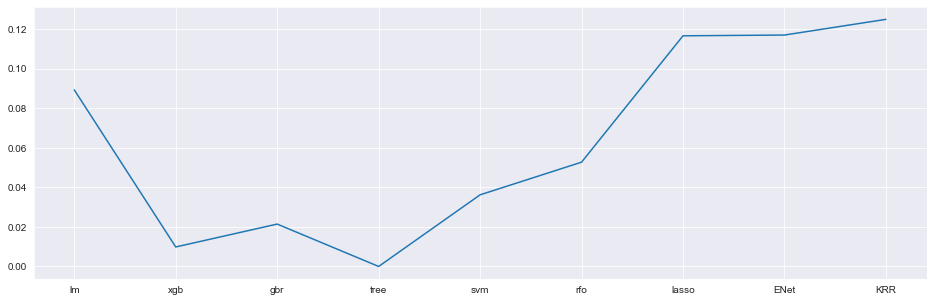

In [351]:
plt.figure(figsize=(16,5))
plt.plot(model_name,error_rate)

## Stacking  models

### Simplest Stacking approach : Averaging base models

**Averaged base models class**

In [79]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

   - Averaged base models score

In [360]:
averaged_models = AveragingModels(models = (XGB, GBR))

In [361]:
averaged_models.fit(X_train, y_train)

[20:45:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


AveragingModels(models=(XGBRegressor(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     importance_type='gain', learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=3, missing=None,
                                     n_estimators=1000, n_jobs=-1, nthread=None,
                                     objective='reg:linear', random_state=0,
                                     reg_alpha=0.001, reg_lambda=1e-06,
                                     s...
                                                  init=None, learning_rate=0.01,
                                                  loss='ls', max_depth=4,
                                                  max_features=None,
                                                  max_leaf_nodes=None,

In [362]:
y_avg = averaged_models.predict(X_train)

In [363]:
print("Averaged base models 정확도 :",averaged_models.score(X_train, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_avg)))

Averaged base models 정확도 : 0.9986551684781152
RMSE: 0.014969519082565823


  - Stacking averaged Models Class

In [209]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

In [381]:
stacked_averaged_models = StackingAveragedModels(base_models = (XGB,GBR), meta_model = XGB)

In [382]:
stacked_averaged_models.fit(X_train.values, y_train)

[20:51:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:52:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingAveragedModels(base_models=(XGBRegressor(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=1, gamma=0,
                                                 importance_type='gain',
                                                 learning_rate=0.1,
                                                 max_delta_step=0, max_depth=3,
                                                 min_child_weight=3,
                                                 missing=None,
                                                 n_estimators=1000, n_jobs=-1,
                                                 nthread=None,
                                                 objective='reg:linear',
                                                 random_state=0,
                  

In [384]:
y_stc = stacked_averaged_models.predict(X_train.values)

In [388]:
print("stacked averaged models 정확도 :",stacked_averaged_models.score(X_train.values, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_stc)))

stacked averaged models 정확도 : 0.9517736228092304
RMSE: 0.08964296805038771


In [222]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction

In [405]:
y_ensemble = y_xgb * 0.9 + y_gbr * 0.05 + y_avg * 0.05
rmsle(y_train, y_ensemble)

0.010466305431888753

In [402]:
y_ensemble2 = y_xgb * 0.9 + y_gbr * 0.05 +y_stc * 0.05
rmsle(y_train, y_ensemble2)

0.011762539870286129

In [400]:
# 안타깝게도 XGBoosting 단일 모델일 때, RMSE 가 더 작게나옴.. ㅠ
rmsle(y_train, y_xgb)

0.009874064290053075

In [394]:
xgb_test = XGB.predict(X_test)
rfo_test = Rforest1.predict(X_test)
gbr_test = GBR.predict(X_test)
svm_test = svm.predict(X_test)
avg_test = averaged_models.predict(X_test)

In [395]:
ensemble_avg = xgb_test * 0.9 + gbr_test * 0.05 + avg_test * 0.05

In [93]:
ensemble = xgb_test * 0.5 + rfo_test * 0.3 + gbr_test * 0.1 + svm_test * 0.05 + avg_test * 0.05

In [397]:
ensemble_xgb  = xgb_test

**Submission**

In [399]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble_avg
sub.to_csv('./data/submission_avb.csv',index=False)